In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path to json
DATA_PATH = "/content/drive/MyDrive/genres-20231105T184718Z-001/genres/data_10.json"

In [ ]:
def load_data(data_path):

  with open(data_path,"r") as f:
    data=json.load(f)

  #convert lists to many arrays
  x = np.array(data["mfcc"])
  y = np.array(data["labels"])

  print("Data successfully loaded")

  return x,y

In [ ]:
#load data
x,y =load_data(DATA_PATH)

Data successfully loaded


In [ ]:
x.shape

(9986, 130, 13)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# **SIMPLE ANN**

In [ ]:
#build network topology
model = keras.Sequential([
        #input layer
        keras.layers.Flatten(input_shape=(x.shape[1],x.shape[2])),

        #1st dense layer
        keras.layers.Dense(512,activation='relu'),

        #2nd dense layer
        keras.layers.Dense(256,activation='relu'),

        #3r dense layer
        keras.layers.Dense(64,activation='relu'),

        #output layer
        keras.layers.Dense(10,activation='softmax'),
])

In [ ]:
#compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 1014218 (3.87 MB)
Trainable params: 1014218 (3.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#train model
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=50)

Epoch 1/50
219/219 [==============================] - 7s 25ms/step - loss: 10.0318 - accuracy: 0.3300 - val_loss: 5.0027 - val_accuracy: 0.3595
Epoch 2/50
219/219 [==============================] - 4s 17ms/step - loss: 3.6519 - accuracy: 0.4318 - val_loss: 3.8100 - val_accuracy: 0.3825
Epoch 3/50
219/219 [==============================] - 4s 19ms/step - loss: 2.5243 - accuracy: 0.4990 - val_loss: 3.2056 - val_accuracy: 0.4242
Epoch 4/50
219/219 [==============================] - 5s 22ms/step - loss: 1.9158 - accuracy: 0.5578 - val_loss: 2.8654 - val_accuracy: 0.4449
Epoch 5/50
219/219 [==============================] - 4s 19ms/step - loss: 1.5602 - accuracy: 0.6011 - val_loss: 2.7002 - val_accuracy: 0.4720
Epoch 6/50
219/219 [==============================] - 4s 19ms/step - loss: 1.2767 - accuracy: 0.6571 - val_loss: 2.7172 - val_accuracy: 0.4626
Epoch 7/50
219/219 [==============================] - 5s 23ms/step - loss: 1.0605 - accuracy: 0.6964 - val_loss: 2.5025 - val_accuracy: 0.489

In [ ]:
model.save("Ann")

In [ ]:
def plot_history(history):
  fig,axs=plt.subplots(2)

  #create accuracy subplots
  axs[0].plot(history.history['accuracy'],label="train accuracy")
  axs[0].plot(history.history['val_accuracy'],label="validation accuracy")
  axs[0].set_ylabel("Accuracy")
  axs[0].legend(loc="lower right")
  axs[0].set_title("Accuracy eval")

  #create error subplot
  axs[1].plot(history.history['loss'],label="train error")
  axs[1].plot(history.history['val_loss'],label="validation error")
  axs[1].set_ylabel("Error")
  axs[1].set_xlabel("Epoch")
  axs[1].legend(loc="upper right")
  axs[1].set_title("Error eval")

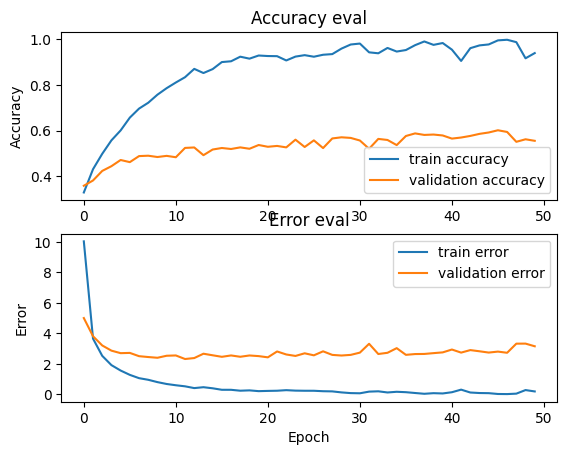

In [ ]:
plot_history(history)

# **MANAGING OVERFITTING**

> Indented block



In [ ]:
#build network topology
model_regularized= keras.Sequential([
        #input layer
        keras.layers.Flatten(input_shape=(x.shape[1],x.shape[2])),

        #1st dense layer
        keras.layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        #2nd dense layer
        keras.layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        #3r dense layer
        keras.layers.Dense(64,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        #output layer
        keras.layers.Dense(10,activation='softmax'),
])

In [ ]:
#compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#train model
history = model_regularized.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=50)

Epoch 1/50
219/219 [==============================] - 7s 26ms/step - loss: 23.3042 - accuracy: 0.1552 - val_loss: 3.4744 - val_accuracy: 0.1822
Epoch 2/50
219/219 [==============================] - 5s 22ms/step - loss: 6.0082 - accuracy: 0.1594 - val_loss: 3.4656 - val_accuracy: 0.1602
Epoch 3/50
219/219 [==============================] - 5s 21ms/step - loss: 4.2973 - accuracy: 0.1422 - val_loss: 3.4374 - val_accuracy: 0.1595
Epoch 4/50
219/219 [==============================] - 4s 18ms/step - loss: 3.8771 - accuracy: 0.1531 - val_loss: 3.4180 - val_accuracy: 0.1629
Epoch 5/50
219/219 [==============================] - 5s 24ms/step - loss: 3.7177 - accuracy: 0.1489 - val_loss: 3.4133 - val_accuracy: 0.1622
Epoch 6/50
219/219 [==============================] - 5s 23ms/step - loss: 3.5914 - accuracy: 0.1526 - val_loss: 3.4128 - val_accuracy: 0.1612
Epoch 7/50
219/219 [==============================] - 4s 20ms/step - loss: 3.5665 - accuracy: 0.1518 - val_loss: 3.3961 - val_accuracy: 0.166

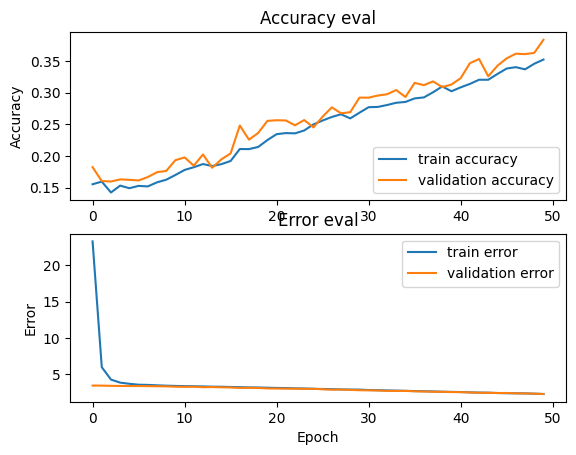

In [ ]:
plot_history(history)

## **CONVOLUTIONAL NEURAL NETWORK**

In [ ]:
#create train/test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
x_train,x_validation,y_train,y_validation = train_test_split(x_train,y_train, test_size=0.2)

#add an axis to input sets
x_train =x_train[...,np.newaxis]
x_validation = x_validation[...,np.newaxis]
x_test=x_test[...,np.newaxis]

In [ ]:
x_train.shape

(5991, 130, 13, 1)

In [ ]:
input_shape = (x_train.shape[1], x_train.shape[2],1)

In [ ]:
#build the CNN
model_cnn = keras.Sequential()

#1st conv layer
model_cnn.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3,3),strides=(2,2),padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

#2nd conv layer
model_cnn.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3,3),strides=(2,2),padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

#3rd conv layer
model_cnn.add(keras.layers.Conv2D(32,(2,2),activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3,3),strides=(2,2),padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

#flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64,activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

#output layer
model_cnn.add(keras.layers.Dense(10,activation='softmax'))


In [ ]:
#compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 6, 32)         0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 64, 6, 32)         128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 2, 32)         0         
 g2D)                                                            
                                                      

In [ ]:
#train model
history = model_cnn.fit(x_train,y_train,validation_data=(x_validation,y_validation),batch_size=32,epochs=50)

Epoch 1/50
188/188 [==============================] - 14s 64ms/step - loss: 2.3506 - accuracy: 0.2364 - val_loss: 1.8951 - val_accuracy: 0.3144
Epoch 2/50
188/188 [==============================] - 11s 58ms/step - loss: 1.8188 - accuracy: 0.3610 - val_loss: 1.5651 - val_accuracy: 0.4319
Epoch 3/50
188/188 [==============================] - 12s 64ms/step - loss: 1.6123 - accuracy: 0.4248 - val_loss: 1.4137 - val_accuracy: 0.4820
Epoch 4/50
188/188 [==============================] - 12s 65ms/step - loss: 1.5124 - accuracy: 0.4560 - val_loss: 1.3236 - val_accuracy: 0.5087
Epoch 5/50
188/188 [==============================] - 12s 65ms/step - loss: 1.4234 - accuracy: 0.4982 - val_loss: 1.2461 - val_accuracy: 0.5454
Epoch 6/50
188/188 [==============================] - 14s 75ms/step - loss: 1.3343 - accuracy: 0.5231 - val_loss: 1.1890 - val_accuracy: 0.5674
Epoch 7/50
188/188 [==============================] - 13s 68ms/step - loss: 1.2737 - accuracy: 0.5475 - val_loss: 1.1442 - val_accuracy:

In [ ]:
model.save("CNN")

In [ ]:
x_to_predict = x_test[0][np.newaxis, ...]
model.predict(x_to_predict)

1/1 [==============================] - 0s 146ms/step


array([[4.2166979e-05, 1.7642212e-11, 1.1309329e-03, 3.1091417e-03,
        2.3202547e-04, 6.1856139e-05, 6.9924670e-07, 9.6345605e-07,
        9.9502313e-01, 3.9918191e-04]], dtype=float32)

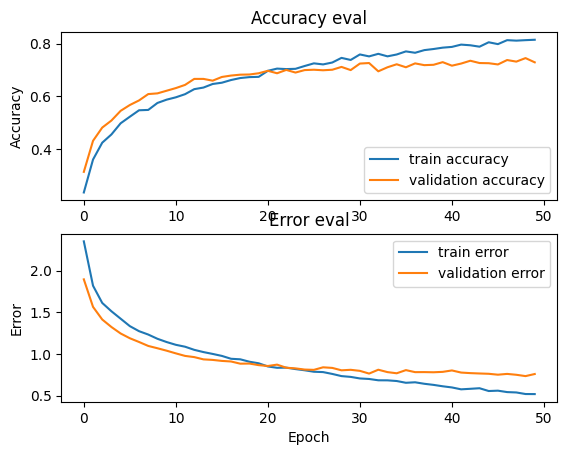

In [ ]:
#plot accuracy and error as a function of the epochs
plot_history(history)

In [ ]:
#evaluate model on Test set
test_loss,test_acc=model_cnn.evaluate(x_test,y_test,verbose=2)
print('\n Test Accuracy:',test_acc)

79/79 - 2s - loss: 0.7900 - accuracy: 0.7253 - 2s/epoch - 20ms/step

 Test Accuracy: 0.7252703309059143


In [ ]:
model_cnn.save("model")

In [ ]:
model_cnn.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#It can be used to reconstruct the model identically
reconstructed_model = keras.models.load_model("model.h5")

# **Prediction On Test Set**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#pick a sample to predict from the test set
x_to_predict = x_test[100]
y_to_predict = y_test[100]

In [ ]:
x_to_predict.shape

(130, 13, 1)

In [ ]:
print("Real Genre:",y_to_predict)

Real Genre: 3


In [ ]:
#add a dimension to input data for sample , model.pedict() expects a 4d array in this case
x_to_predict = x_to_predict[np.newaxis, ...] #array hape(1,130,13,1)

In [ ]:
x_to_predict.shape

(1, 130, 13, 1)

In [ ]:
#perform prediction
prediction = model_cnn.predict(x_to_predict)

1/1 [==============================] - 0s 135ms/step


In [ ]:
#get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:",int(predicted_index))

Predicted Genre: 3


<ipython-input-39-c9d8896dd481>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted Genre:",int(predicted_index))


In [ ]:
#pick a sample to predict from the test set
x_to_predict = x_test[50]
y_to_predict = y_test[50]

print("Real Genre:",y_to_predict)

x_to_predict = x_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(x_to_predict)

#get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:",int(predicted_index))


Real Genre: 4
1/1 [==============================] - 0s 25ms/step
Predicted Genre: 4


<ipython-input-40-b0a476e5db0c>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted Genre:",int(predicted_index))


In [ ]:
len(x_test)

2497

In [ ]:
for n in range(10):

  i=random.randint(0,len(x_test))
  #pick a sample to predict from the test set
  x_to_predict = x_test[i]
  y_to_predict = y_test[i]

  print("Real Genre:",y_to_predict)

  x_to_predict = x_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(x_to_predict)

  #get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:",int(predicted_index))


Real Genre: 6
1/1 [==============================] - 0s 23ms/step
Predicted Genre: 6
Real Genre: 3
1/1 [==============================] - 0s 22ms/step
Predicted Genre: 3
Real Genre: 1
1/1 [==============================] - 0s 23ms/step
Predicted Genre: 1
Real Genre: 2


<ipython-input-42-3687a506114c>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted Genre:",int(predicted_index))


1/1 [==============================] - 0s 23ms/step
Predicted Genre: 2
Real Genre: 1
1/1 [==============================] - 0s 28ms/step
Predicted Genre: 1
Real Genre: 9
1/1 [==============================] - 0s 24ms/step
Predicted Genre: 9
Real Genre: 8
1/1 [==============================] - 0s 24ms/step
Predicted Genre: 9
Real Genre: 9
1/1 [==============================] - 0s 33ms/step
Predicted Genre: 2
Real Genre: 5
1/1 [==============================] - 0s 28ms/step
Predicted Genre: 5
Real Genre: 6
1/1 [==============================] - 0s 23ms/step
Predicted Genre: 6
